In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("ventas.xlsx")
df.head()            # Primeras 5 filas
df.shape             # Filas y columnas
df.info()            # Tipos de datos y nulos
df.describe()        # Estadísticas numéricas básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                1809 non-null   int64  
 1   FACTURA_ID       1809 non-null   int64  
 2   FECHA            1809 non-null   object 
 3   ESTABLECIMIENTO  1809 non-null   object 
 4   CATEGORIA        1809 non-null   object 
 5   CODIGO           1809 non-null   object 
 6   AGRUPAR_POR      1809 non-null   object 
 7   COLOR            0 non-null      float64
 8   TALLA            0 non-null      float64
 9   TIPO             1809 non-null   object 
 10  IMPUESTO         1809 non-null   object 
 11  TIPO_DE_PAGO     1809 non-null   int64  
 12  FORMA_DE_PAGO    1809 non-null   int64  
 13  SERIE            1809 non-null   object 
 14  NUMERO           1809 non-null   int64  
 15  SERIE_FEL        229 non-null    object 
 16  NUMERO_FEL       229 non-null    float64
 17  NIT           

,#,FACTURA_ID,COLOR,TALLA,TIPO_DE_PAGO,FORMA_DE_PAGO,NUMERO,NUMERO_FEL,PACIENTE,CANTIDAD,COSTO,COSTO TOTAL,DESCUENTO,TOTAL,UTILIDAD
count,1809.000000,1809.000000,0.0,0.0,1809.0,1809.0,1809.000000,2.290000e+02,0.0,1809.000000,0.0,0.0,1809.000000,1809.000000,1809.000000
mean,905.000000,795473.403538,NaN,NaN,0.0,0.0,666.734660,2.025814e+09,NaN,1.699281,NaN,NaN,32.999320,1038.097927,624.947070
std,522.357636,258902.947704,NaN,NaN,0.0,0.0,302.184254,1.223389e+09,NaN,1.636558,NaN,NaN,182.688594,2498.011707,1713.619317
min,1.000000,60040.000000,NaN,NaN,0.0,0.0,9.000000,1.574618e+07,NaN,1.000000,NaN,NaN,0.000000,0.000000,-599.000000
25%,453.000000,813349.000000,NaN,NaN,0.0,0.0,458.000000,8.808890e+08,NaN,1.000000,NaN,NaN,0.000000,7.000000,5.000000
50%,905.000000,909979.000000,NaN,NaN,0.0,0.0,698.000000,1.993623e+09,NaN,1.000000,NaN,NaN,0.000000,28.000000,20.000000
75%,1357.000000,950865.000000,NaN,NaN,0.0,0.0,910.000000,3.004122e+09,NaN,2.000000,NaN,NaN,0.000000,375.000000,168.000000
max,1809.000000,987170.000000,NaN,NaN,0.0,0.0,1160.000000,4.238100e+09,NaN,15.000000,NaN,NaN,2650.000000,33000.000000,33000.000000


In [4]:
df.isnull().sum()        # Conteo de nulos por columna
df.duplicated().sum()    # Conteo de duplicados

0

C:\Users\ckicu\AppData\Local\Temp\ipykernel_17476\1986835984.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA'] = pd.to_datetime(df['FECHA'])


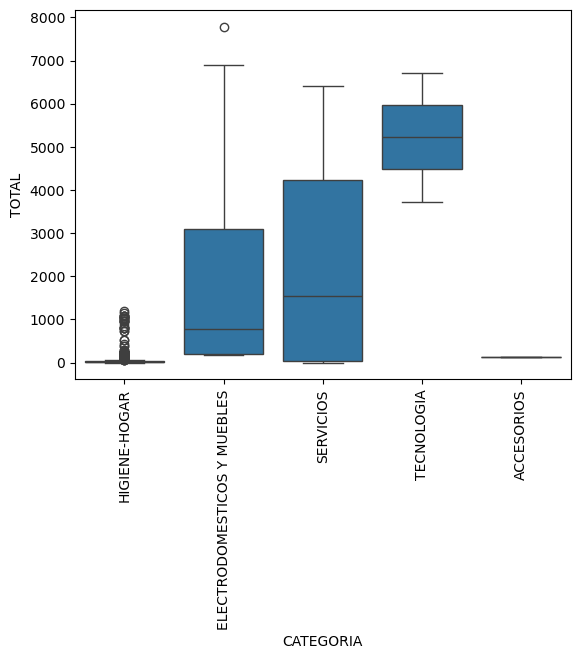

<Axes: xlabel='TIPO', ylabel='UTILIDAD'>

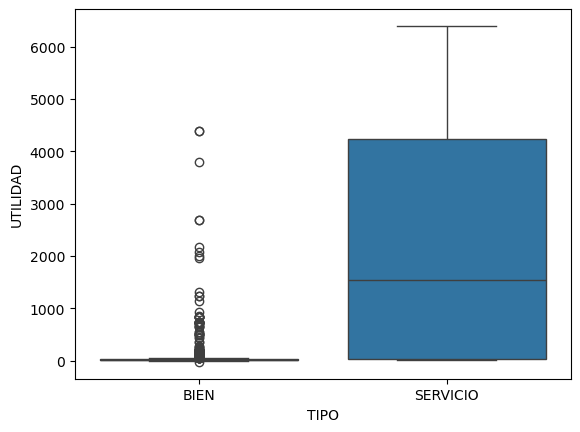

In [5]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df = df[df["FECHA"].dt.year == 2025]
sns.boxplot(x='CATEGORIA', y='TOTAL', data=df)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='TIPO', y='UTILIDAD', data=df)

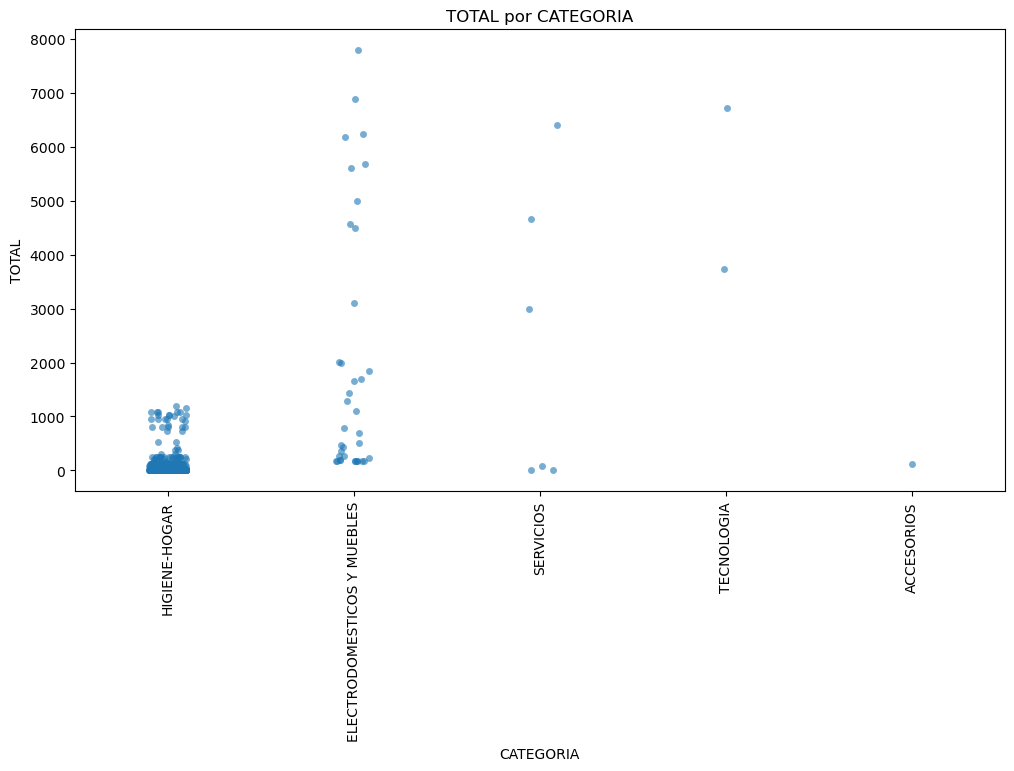

In [6]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='CATEGORIA', y='TOTAL', data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=90)
plt.title('TOTAL por CATEGORIA')
plt.show()

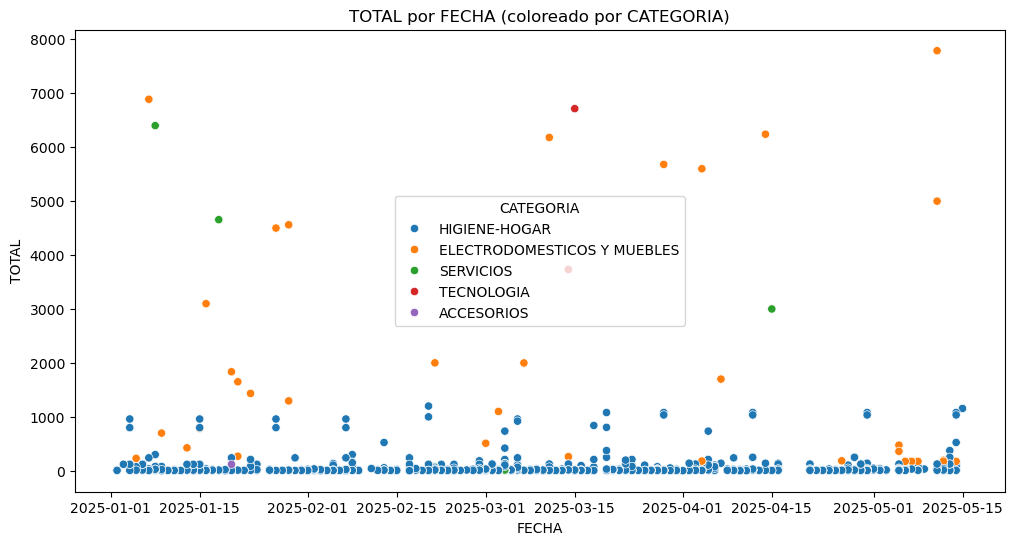

In [7]:
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FECHA', y='TOTAL', hue='CATEGORIA', data=df)
plt.title('TOTAL por FECHA (coloreado por CATEGORIA)')
plt.show()

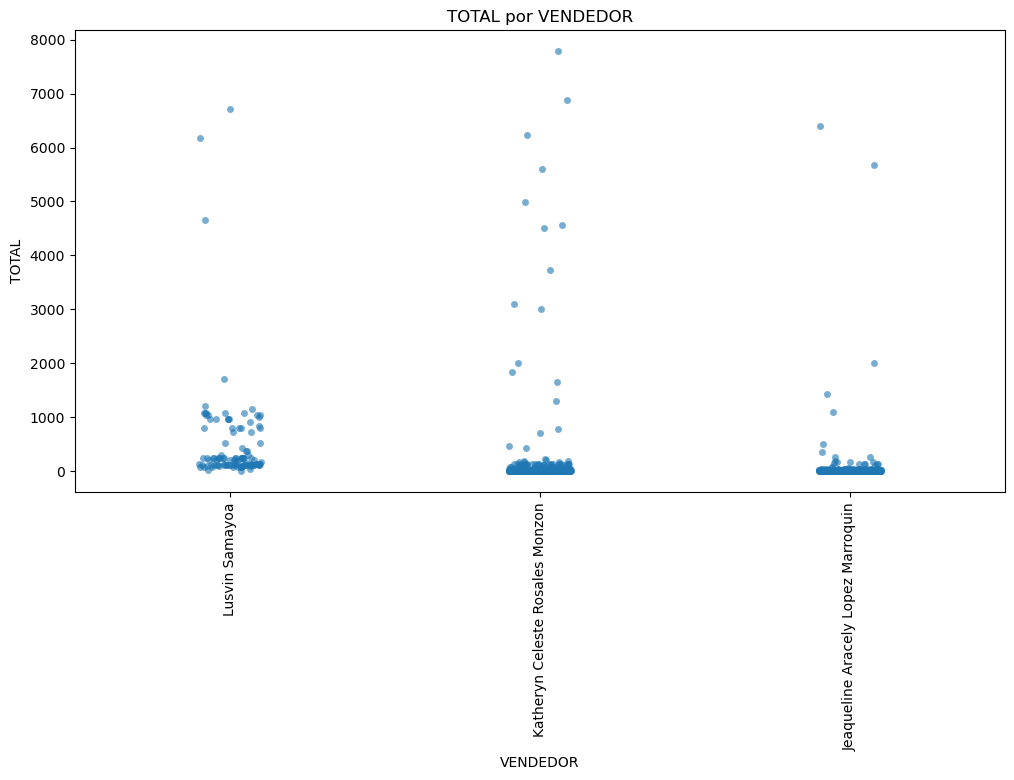

In [8]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='VENDEDOR', y='TOTAL', data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=90)
plt.title('TOTAL por VENDEDOR')
plt.show()

In [9]:
# Agrupar por fecha y sumar total
df['MES'] = df['FECHA'].dt.month

ventas_mayo = df[df['MES'] == 5]
ventas_mayo.groupby('CATEGORIA')['TOTAL'].sum().sort_values(ascending=False)

CATEGORIA
ELECTRODOMESTICOS Y MUEBLES    14867.0
HIGIENE-HOGAR                   7331.0
Name: TOTAL, dtype: float64

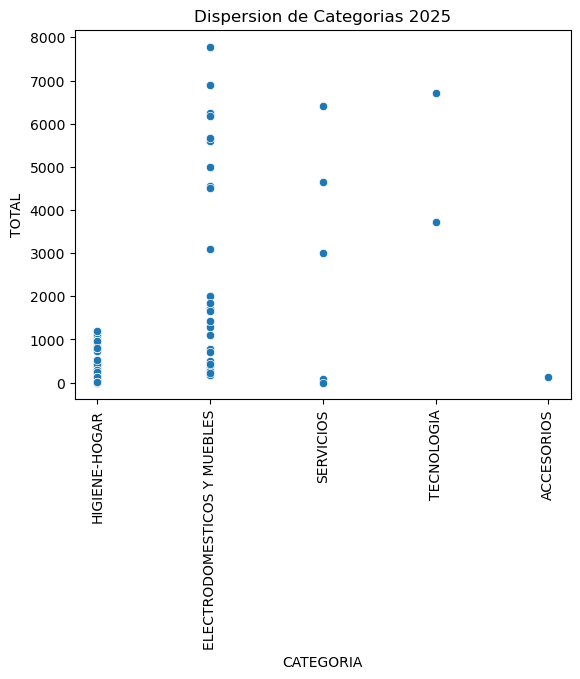

In [10]:
# grafica de dispersion en relacion a las categorias 2025
df['Year'] = df['FECHA'].dt.year

ventas_mayo = df[df["Year"]==2025]
sns.scatterplot(data=ventas_mayo, x="CATEGORIA", y="TOTAL")
plt.title("Dispersion de Categorias 2025")
plt.xticks(rotation=90)
plt.show()

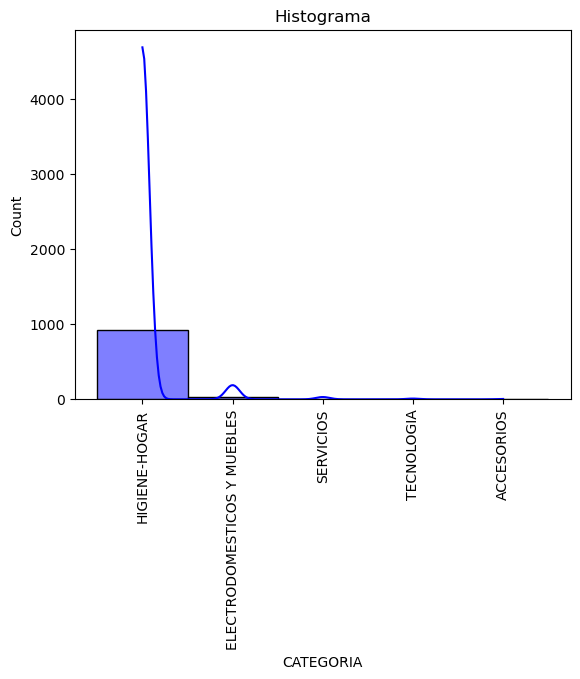

In [11]:
#Hisograma del precio
sns.histplot(ventas_mayo["CATEGORIA"], kde=True, color="b")
plt.title("Histograma")
plt.xticks(rotation=90)
plt.show()